# **Support Vector machine**

**Dataset:** Mushroom Dataset

**Tasks:**

Task 1: Exploratory Data Analysis (EDA)

1) Load the Mushroom dataset and perform fundamental data exploration.

2) Utilize histograms, box plots, or density plots to understand feature distributions.

3) Investigate feature correlations to discern relationships within the data.

Task 2: Data Preprocessing

1) Encode categorical variables if necessary.

2) Split the dataset into training and testing sets.

Task 3: Data Visualization

1) Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

2) Visualize class distributions to gauge dataset balance or imbalance.

Task 4: SVM Implementation

1) Implement a basic SVM classifier using Python libraries like scikit-learn.

2) Train the SVM model on the training data.

3) Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

Task 5: Visualization of SVM Results

1) Visualize classification results on the testing data.

Task 6: Parameter Tuning and Optimization

1) Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

Task 7: Comparison and Analysis

1) Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

2) Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

3) Discuss practical implications of SVM in real-world classification tasks.


**Task 1: Exploratory Data Analysis (EDA)**

1) Load the Mushroom dataset and perform fundamental data exploration.

In [2]:
import pandas as pd

# Load the Mushroom dataset
df = pd.read_csv('/content/mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [4]:
# Summary statistics
print(df.describe())

        Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054


In [5]:
# Check for data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [6]:
# Check for null values
print(df.isnull().sum())

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


2) Utilize histograms, box plots, or density plots to understand feature distributions.


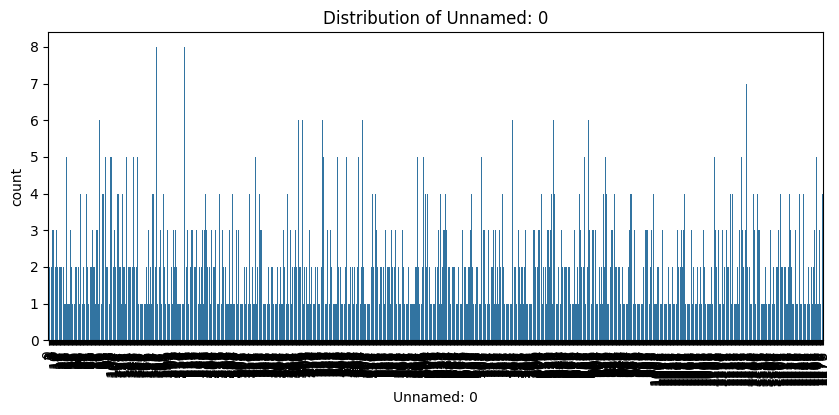

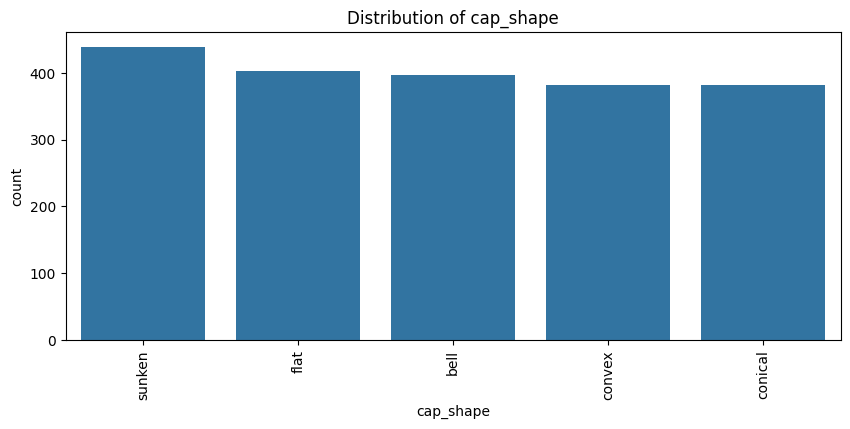

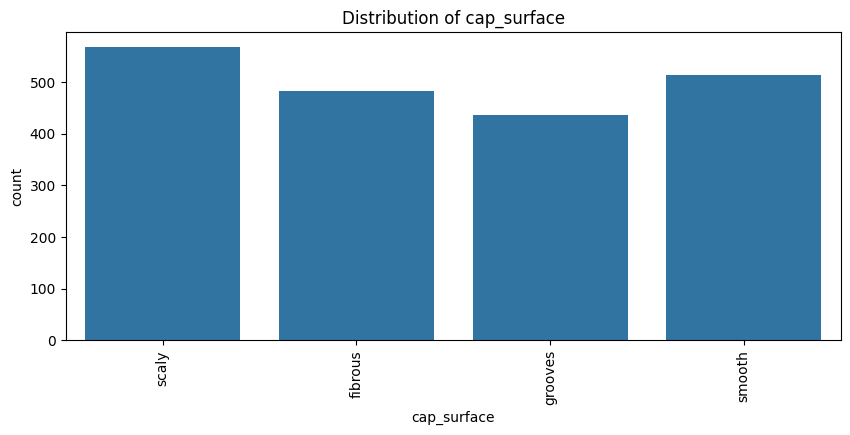

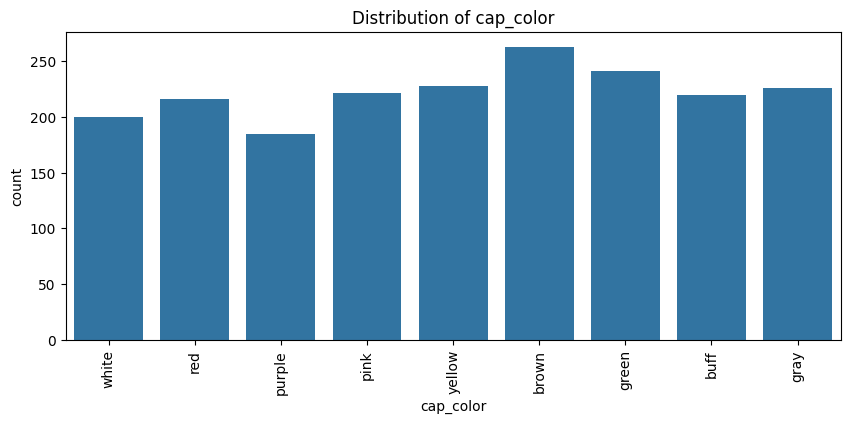

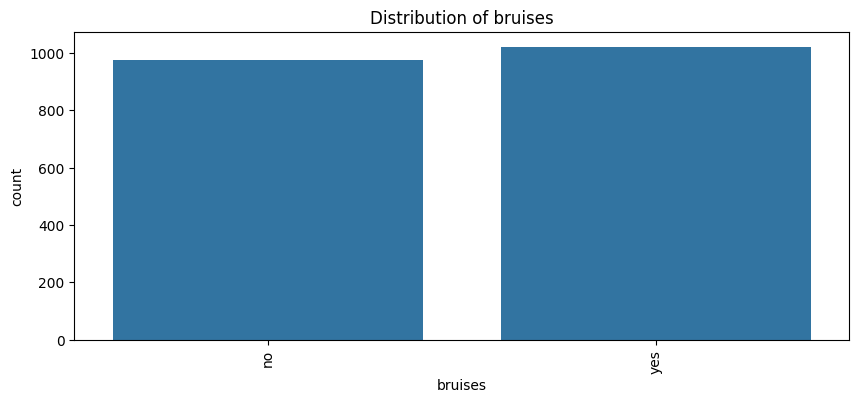

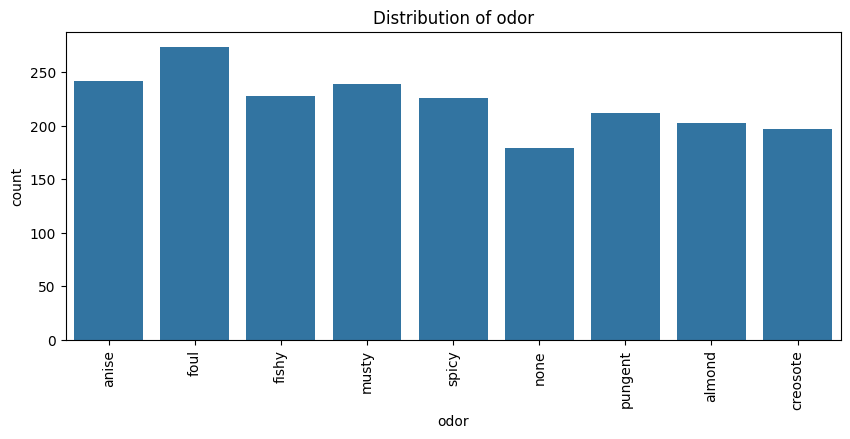

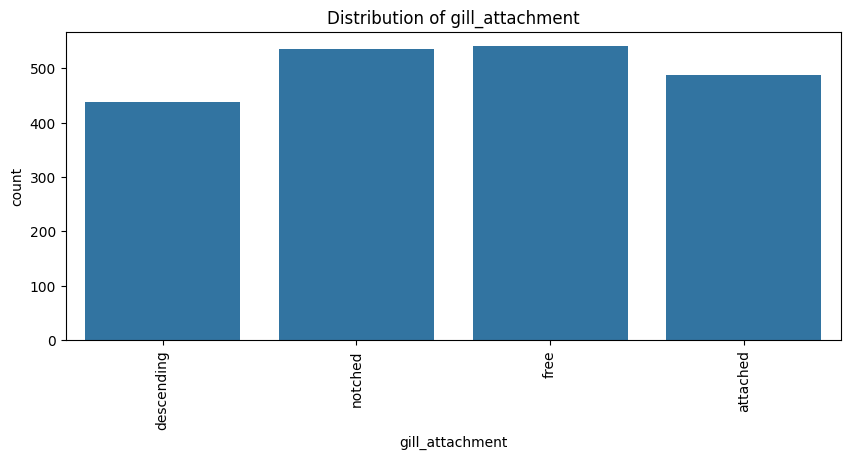

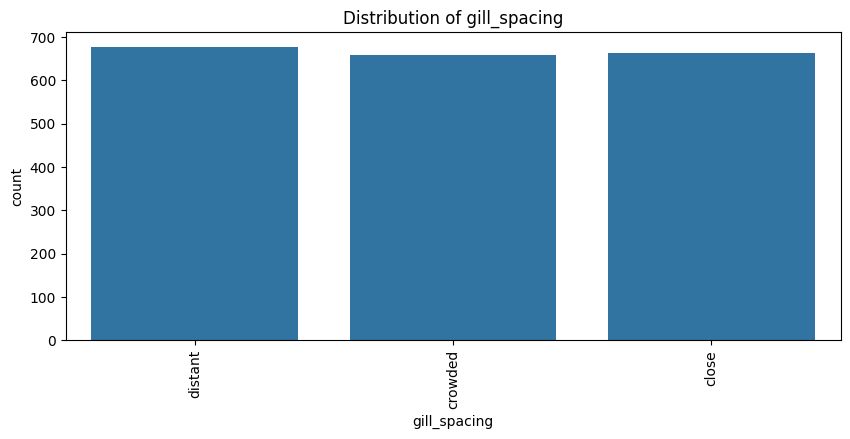

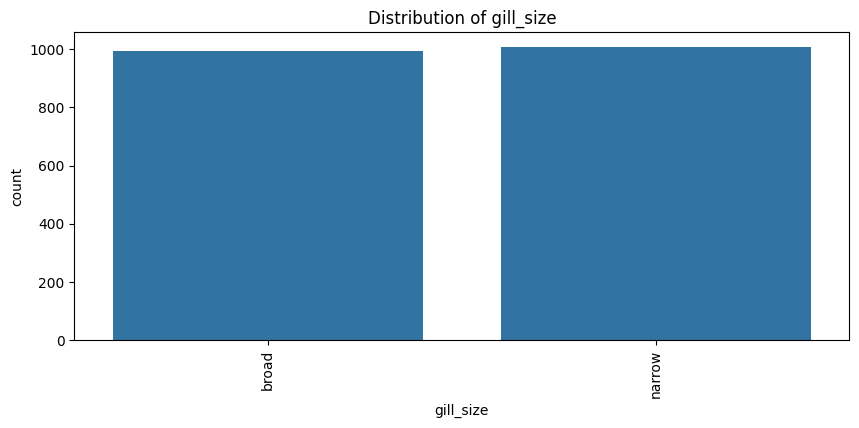

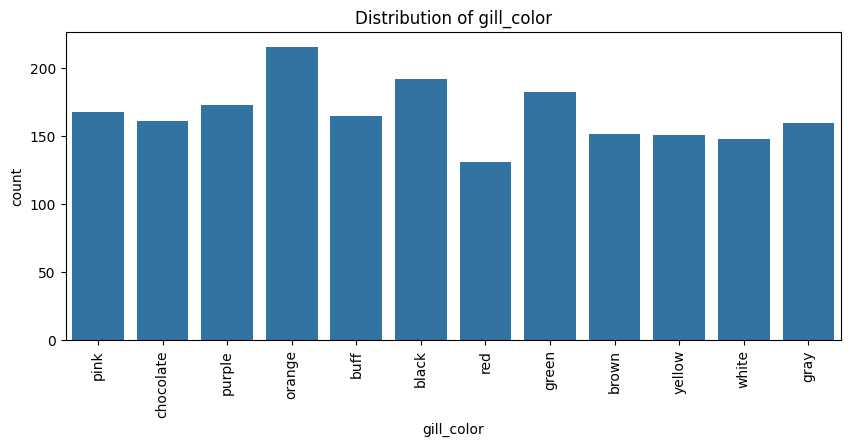

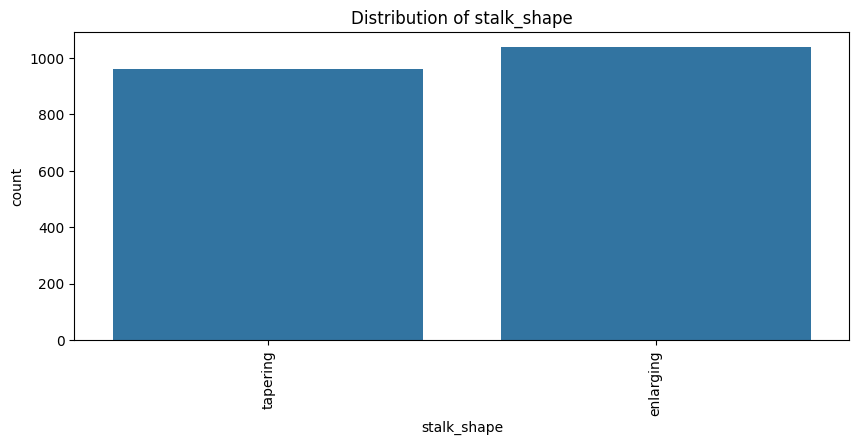

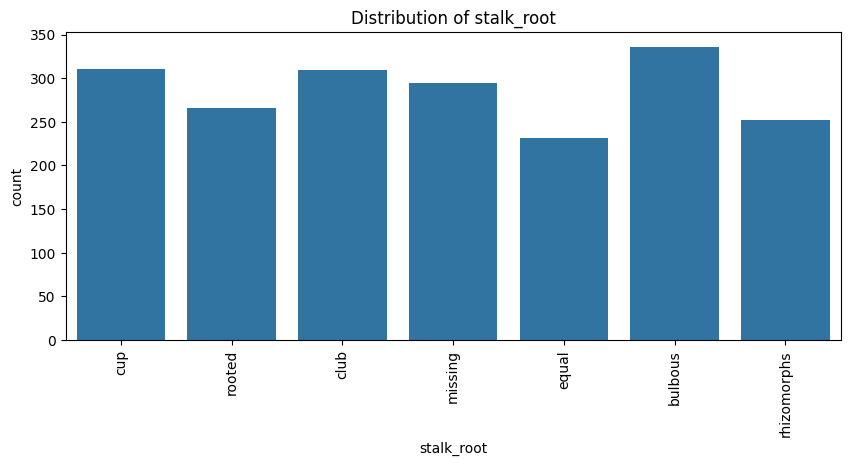

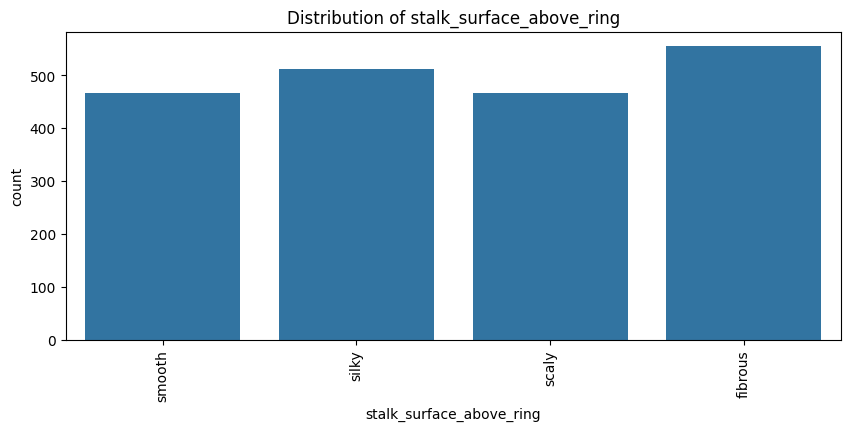

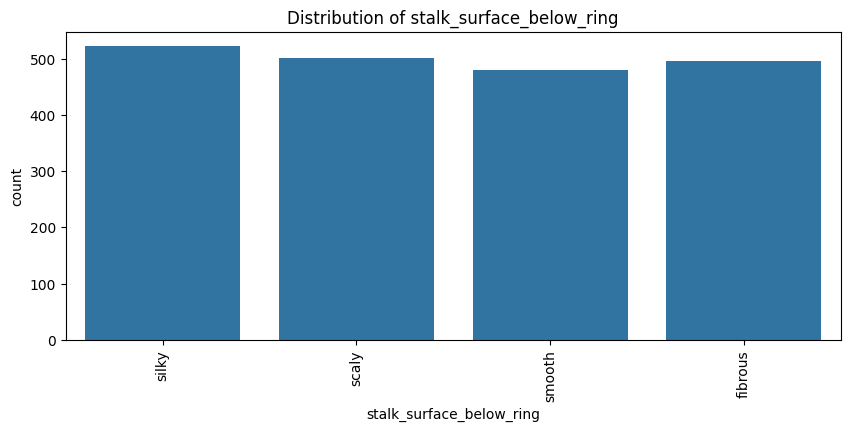

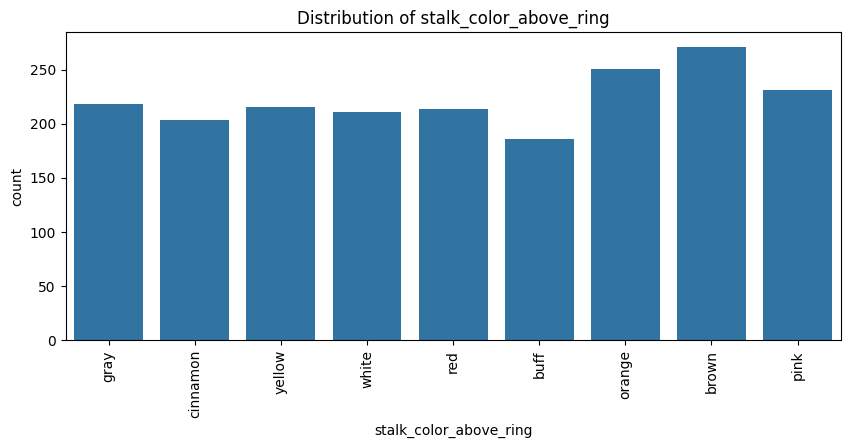

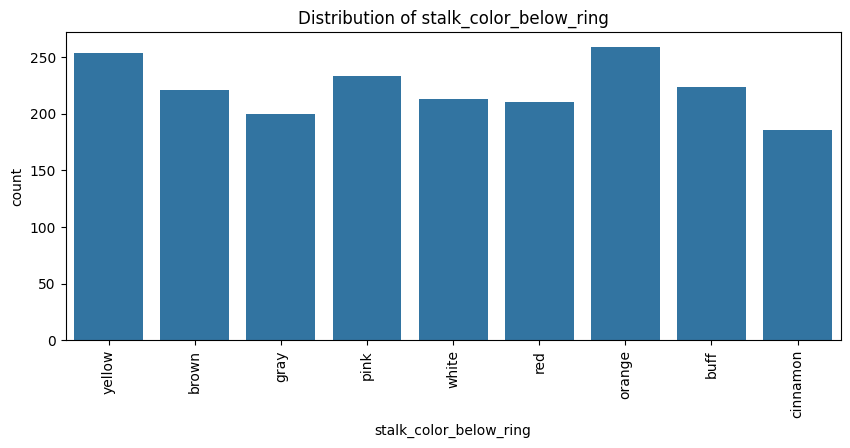

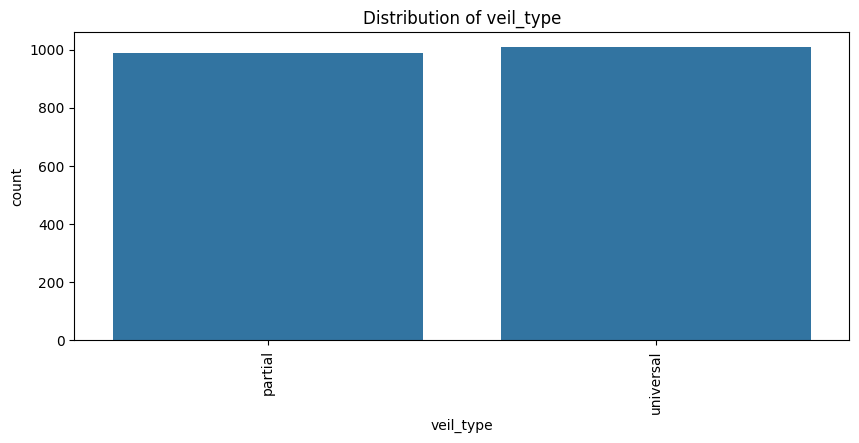

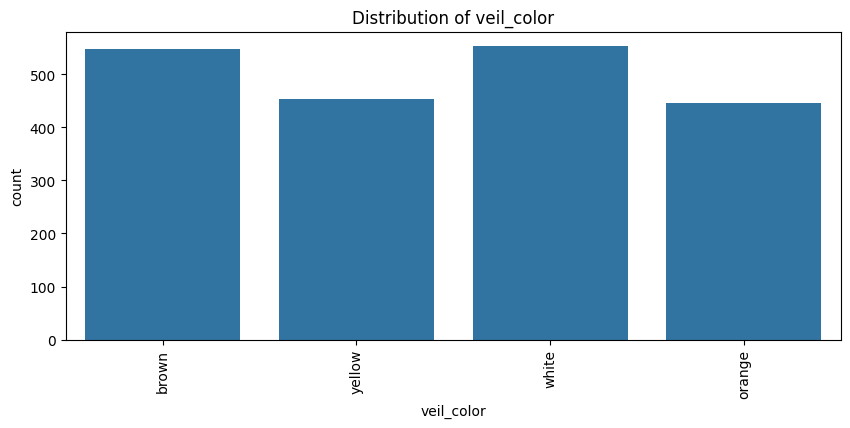

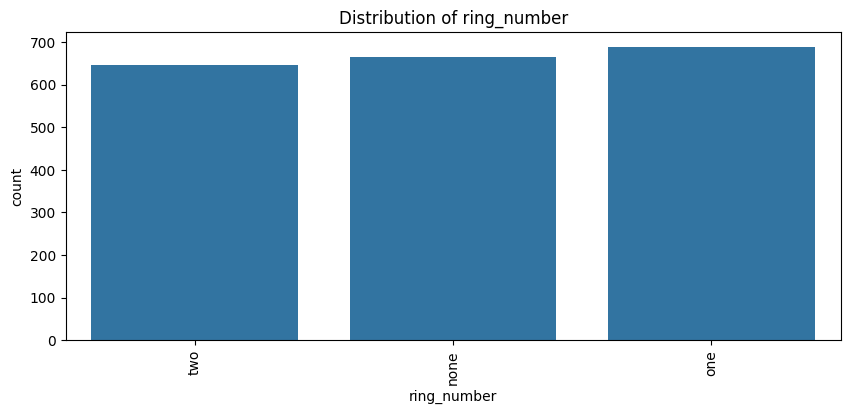

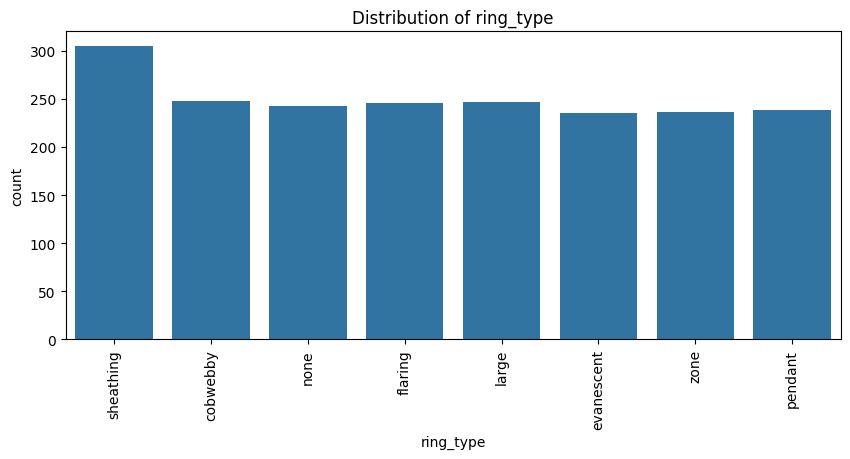

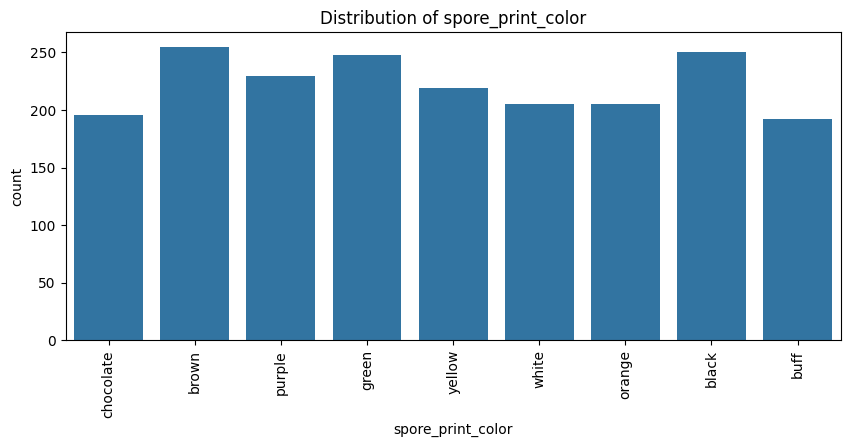

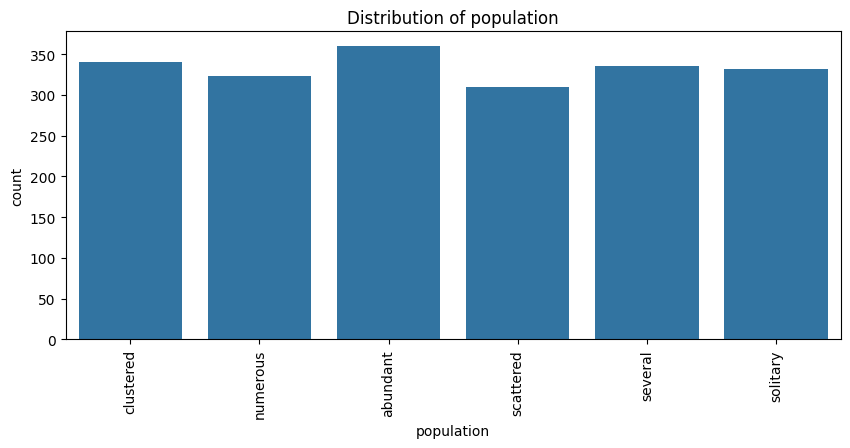

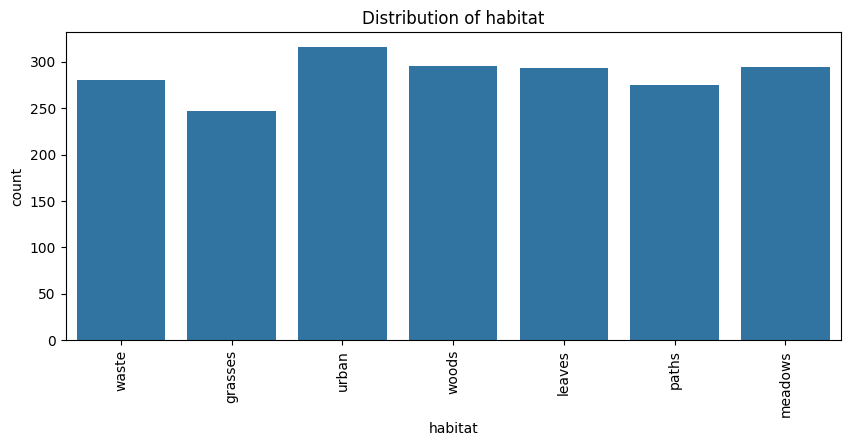

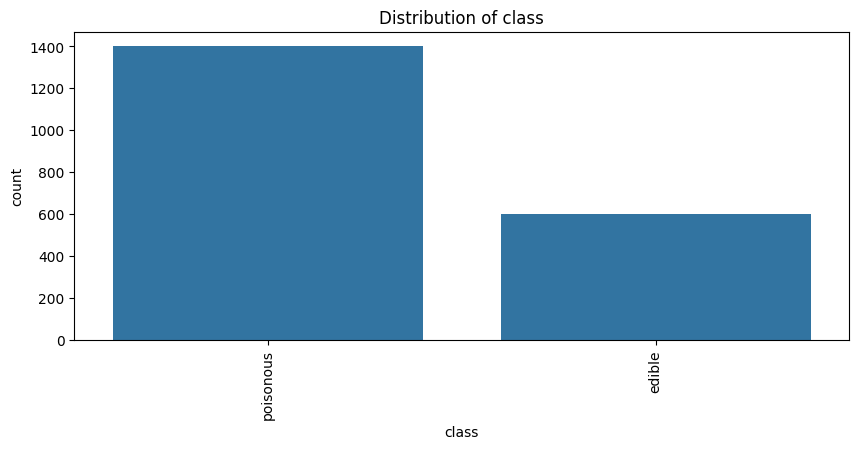

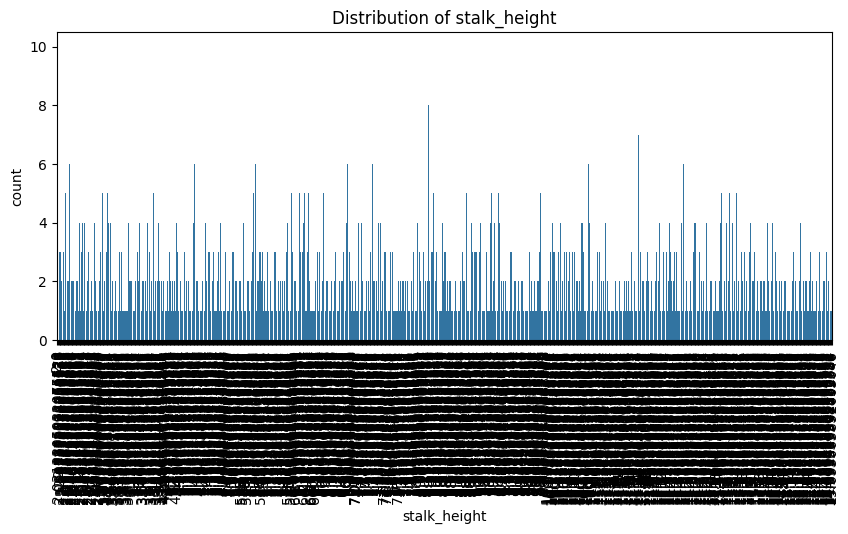

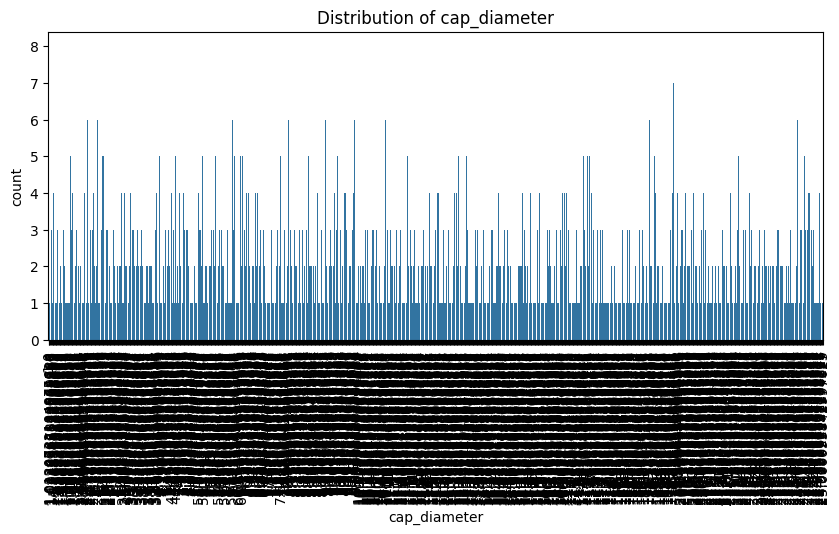

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for categorical features
for column in df.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()


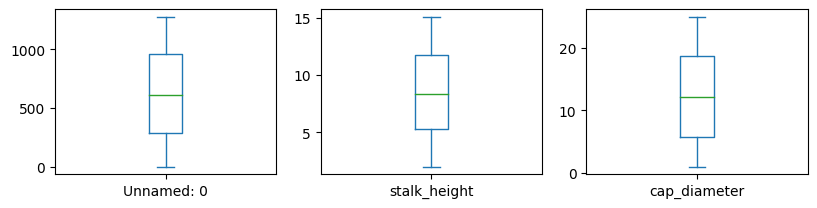

In [10]:
# Plot box plots for all features
df.plot(kind='box', subplots=True, layout=(6,6), figsize=(20, 15))
plt.show()

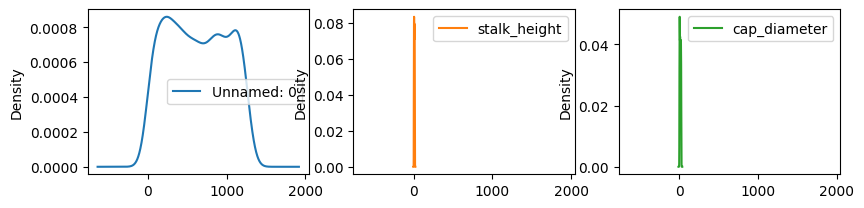

In [8]:
# Plot density plots for all features
df.plot(kind='density', subplots=True, layout=(6,6), figsize=(20, 15))
plt.show()

3) Investigate feature correlations to discern relationships within the data.

In [11]:
from scipy.stats import chi2_contingency

# Compute chi-square statistics for feature pairs
def chi2_contingency_features(df, feature1, feature2):
    crosstab = pd.crosstab(df[feature1], df[feature2])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    return chi2, p

for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        chi2, p = chi2_contingency_features(df, df.columns[i], df.columns[j])
        print(f'Chi-square test between {df.columns[i]} and {df.columns[j]}: Chi2={chi2:.2f}, p-value={p:.4f}')


Chi-square test between Unnamed: 0 and cap_shape: Chi2=8000.00, p-value=0.0000
Chi-square test between Unnamed: 0 and cap_surface: Chi2=6000.00, p-value=0.0000
Chi-square test between Unnamed: 0 and cap_color: Chi2=16000.00, p-value=0.0000
Chi-square test between Unnamed: 0 and bruises: Chi2=2000.00, p-value=0.0000
Chi-square test between Unnamed: 0 and odor: Chi2=16000.00, p-value=0.0000
Chi-square test between Unnamed: 0 and gill_attachment: Chi2=6000.00, p-value=0.0000
Chi-square test between Unnamed: 0 and gill_spacing: Chi2=4000.00, p-value=0.0000
Chi-square test between Unnamed: 0 and gill_size: Chi2=2000.00, p-value=0.0000
Chi-square test between Unnamed: 0 and gill_color: Chi2=22000.00, p-value=0.0000
Chi-square test between Unnamed: 0 and stalk_shape: Chi2=2000.00, p-value=0.0000
Chi-square test between Unnamed: 0 and stalk_root: Chi2=12000.00, p-value=0.0000
Chi-square test between Unnamed: 0 and stalk_surface_above_ring: Chi2=6000.00, p-value=0.0000
Chi-square test between U

**Task 2: Data Preprocessing**

1) Encode categorical variables if necessary.

In [12]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df)

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
encoded_df.columns

Index(['Unnamed: 0_0', 'Unnamed: 0_1', 'Unnamed: 0_2', 'Unnamed: 0_3',
       'Unnamed: 0_4', 'Unnamed: 0_5', 'Unnamed: 0_8', 'Unnamed: 0_9',
       'Unnamed: 0_10', 'Unnamed: 0_11',
       ...
       'cap_diameter_24.687267754636736', 'cap_diameter_24.72272198929874',
       'cap_diameter_24.72631002311142', 'cap_diameter_24.737114865105827',
       'cap_diameter_24.786560809529952', 'cap_diameter_24.85184031275723',
       'cap_diameter_24.90662607194244', 'cap_diameter_24.912770128156826',
       'cap_diameter_24.938622172274297', 'cap_diameter_25.000053842997023'],
      dtype='object', length=3051)

2) Split the dataset into training and testing sets.

In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = encoded_df
y = df['class']  # Assuming 'class' is the target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Task 3: Data Visualization**

1) Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

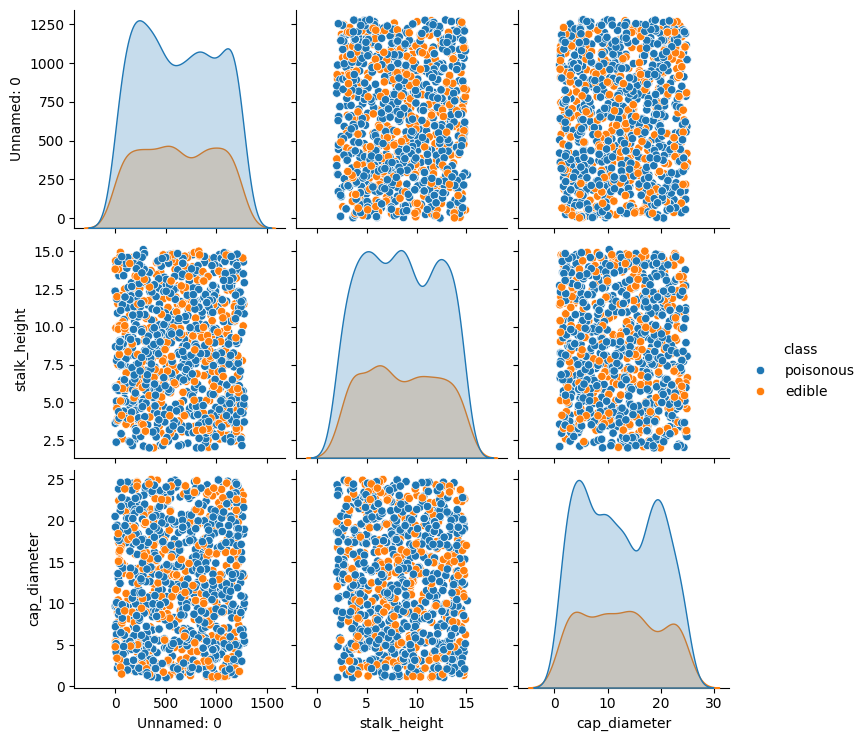

In [15]:
# Scatter plot matrix or pair plot (if the dataset is small enough)
sns.pairplot(df, hue='class')
plt.show()


2) Visualize class distributions to gauge dataset balance or imbalance.

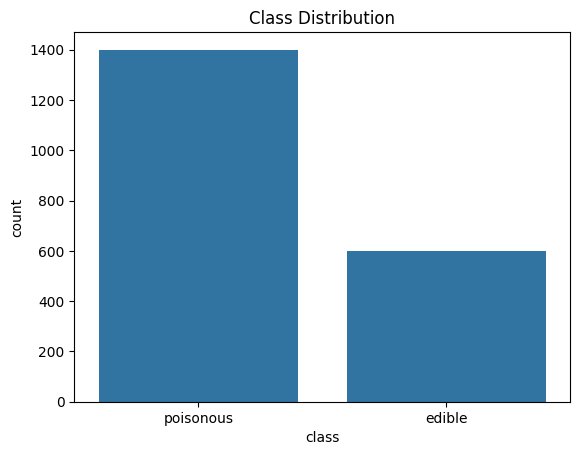

In [16]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()


**Task 4: SVM Implementation**

1) Implement a basic SVM classifier using Python libraries like scikit-learn.


In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


2) Train the SVM model on the training data.

In [19]:
# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test)


3) Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [20]:
# Evaluate performance
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       133
   poisonous       1.00      1.00      1.00       267

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



**Task 5: Visualization of SVM Results**

1) Visualize classification results on the testing data.

<ipython-input-31-7cf39f8fe2b5>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='coolwarm', marker='o', alpha=0.7)


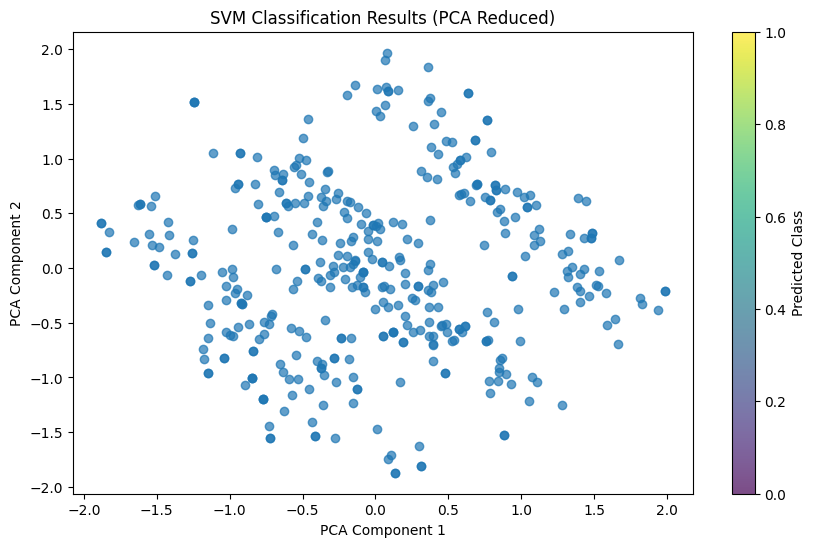

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Predict using the trained SVM model
y_pred = svm_model.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='coolwarm', marker='o', alpha=0.7)
plt.colorbar(scatter, label='Predicted Class')
plt.title('SVM Classification Results (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


**Task 6: Parameter Tuning and Optimization**

1) Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [32]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 1.00


**Task 7: Comparison and Analysis**

1) Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [33]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f'Kernel: {kernel}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(classification_report(y_test, y_pred))


Kernel: linear
Accuracy: 1.00
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       133
   poisonous       1.00      1.00      1.00       267

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Kernel: poly
Accuracy: 1.00
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       133
   poisonous       1.00      1.00      1.00       267

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Kernel: rbf
Accuracy: 1.00
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       133
   poisonous       1.00      1.00      1.00       267

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00

2) Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

Ans:

Analyzing the strengths and weaknesses of SVM (Support Vector Machine) classifiers for the Mushroom dataset involves evaluating various aspects based on the Exploratory Data Analysis (EDA) and visualization results. Let's break down the analysis:

**Strengths of SVM**

**Effective in High-Dimensional Spaces:**

Strength: SVMs are known for their effectiveness in high-dimensional spaces, making them suitable for datasets with many features.

Analysis: After one-hot encoding categorical variables, the Mushroom dataset likely has a high-dimensional feature space. SVMs can handle this well, especially with the use of kernel functions that can map the data into higher dimensions.

**Clear Margin of Separation:**

Strength: SVMs aim to find the hyperplane that maximizes the margin between classes, which can be effective if there is a clear separation between classes.

Analysis: If the PCA or decision boundary visualization shows that classes are well-separated in the reduced feature space, this indicates that the SVM is effectively finding a margin with good separation.

**Robust to Overfitting:**

Strength: With proper regularization, SVMs can be less prone to overfitting, especially with the C parameter that controls the trade-off between achieving a low error on the training data and minimizing the model complexity.

Analysis: If the model shows consistent performance across training and test datasets, it suggests effective regularization and robustness.
Weaknesses of SVM

**High Computational Cost for Large Datasets:**

Weakness: SVMs can be computationally expensive and slow to train on very large datasets or with very large feature spaces.

Analysis: If training or predictions take a long time, or if scaling up the dataset results in performance issues, this indicates a computational weakness. Consider this in the context of large datasets or high-dimensional data.

**Sensitivity to Choice of Hyperparameters:**

Weakness: The performance of SVMs is highly dependent on the choice of hyperparameters like the kernel type (linear, poly, rbf), regularization parameter C, and kernel-specific parameters (gamma for rbf).

Analysis: If tuning different hyperparameters results in varying performance, this highlights the sensitivity of SVMs to hyperparameter selection. Use techniques like Grid Search or Random Search to optimize these parameters.

**Difficulty with Non-linearly Separable Data:**

Weakness: While SVMs can handle non-linearly separable data with appropriate kernels, they may struggle if the kernel choice or hyperparameter settings are not optimal.

Analysis: If visualizations show overlapping regions where classes are not well-separated, this suggests that the chosen kernel may not be appropriate. Consider experimenting with different kernels or adjusting hyperparameters.

**Less Interpretability:**

Weakness: SVMs, especially with non-linear kernels, can be harder to interpret compared to simpler models like decision trees or linear models.

Analysis: If interpretability is important, the complex decision boundaries of SVMs might be less useful for understanding the model's behavior. Consider using feature importance or simpler models if interpretability is crucial.
Summary of Analysis Based on EDA and Visualization


**EDA Findings**

**Dimensionality:**

The Mushroom dataset likely has a high-dimensional feature space after encoding. SVMs are well-suited for this, but ensure that you handle large feature spaces efficiently.

**Class Distribution:**

If the dataset is imbalanced, SVMs might require adjustments to class weights or additional preprocessing.

**Visualization Insights**

**PCA Visualization:**

If PCA shows that the SVM classifier can effectively separate classes, it indicates that the SVM is performing well in high-dimensional space.
Decision Boundaries: If decision boundaries are clear and well-separated, the SVM is successfully finding the margin between classes. If boundaries are unclear or overlap significantly, consider adjusting the kernel or hyperparameters.

**Confusion Matrix:**

Provides insights into the types of classification errors (e.g., false positives and false negatives). High accuracy with low errors across both classes suggests strong performance, while high error rates indicate areas for improvement.

By analyzing these aspects, you can assess the suitability of SVMs for the Mushroom dataset and make informed decisions on potential adjustments or alternative models.

3) Discuss practical implications of SVM in real-world classification tasks.

Ans:

**1. General Characteristics of SVM**

Margin Maximization: SVMs aim to find the hyperplane that maximizes the margin between classes. This property is beneficial for ensuring robust classification, especially when there's a clear separation between classes.

Kernel Trick: SVMs can handle non-linearly separable data through kernel functions, such as polynomial or radial basis function (RBF) kernels. This flexibility allows them to model complex relationships between features.

Regularization: The regularization parameter
𝐶
C helps balance the trade-off between achieving a low error on the training data and maintaining model simplicity, which can prevent overfitting.

**2. Practical Applications**

a) Image Classification:

Example: SVMs are used in face recognition, handwritten digit recognition (e.g., MNIST dataset), and object detection tasks.
Implication: In image classification, SVMs can be effective, especially when combined with feature extraction methods like Histogram of Oriented Gradients (HOG) or deep learning features.

b) Text Classification:

Example: SVMs are applied in spam detection, sentiment analysis, and topic categorization.
Implication: Text data, which is often high-dimensional due to word embeddings or bag-of-words representations, fits well with SVMs. SVMs perform well in scenarios with clear class boundaries and are robust against noisy data.

c) Medical Diagnosis:

Example: SVMs are used for classifying diseases based on patient data, such as cancer diagnosis or predicting the presence of diabetes.
Implication: In medical diagnosis, SVMs can handle high-dimensional data (e.g., gene expression profiles) and provide clear decision boundaries. However, careful tuning is required to avoid overfitting and ensure generalization to new patients.

d) Financial Forecasting:

Example: SVMs can be used for predicting stock prices, credit scoring, and fraud detection.
Implication: Financial data often includes many features and may be non-linearly separable. SVMs, with appropriate kernels, can capture complex patterns. However, SVMs can be sensitive to noisy data and require careful parameter tuning.

e) Bioinformatics:

Example: SVMs are used in gene classification, protein function prediction, and other biological sequence analyses.
Implication: High-dimensional biological data (e.g., gene expression data) makes SVMs suitable due to their ability to handle large feature spaces and provide robust classification.

**3. Strengths and Weaknesses in Real-World Context**

Strengths:

High-Dimensional Data Handling: SVMs are particularly effective for high-dimensional datasets, making them suitable for fields like bioinformatics and text classification.

Robustness: With appropriate parameter tuning, SVMs are robust against overfitting and can generalize well to unseen data.

Flexibility with Kernels: The ability to use different kernels allows SVMs to model both linear and non-linear relationships, making them versatile for various problems.

Weaknesses:

Scalability: SVMs can be computationally intensive and slow to train, especially with large datasets or many features. This can be a limitation in real-time or large-scale applications.

Hyperparameter Sensitivity: SVM performance is highly dependent on the choice of hyperparameters (e.g., kernel type,
𝐶
C, gamma). Finding the optimal settings requires extensive tuning and validation.

Interpretability: The decision boundaries created by SVMs, especially with non-linear kernels, can be complex and less interpretable compared to simpler models like decision trees or linear classifiers.

**4. Practical Considerations**

Data Preprocessing: Ensure that data is well-preprocessed and scaled, as SVMs are sensitive to feature scaling.

Parameter Tuning: Use techniques like Grid Search or Random Search to optimize hyperparameters and improve model performance.

Kernel Choice: Select the appropriate kernel based on the data characteristics. For linearly separable data, a linear kernel might suffice, while non-linear data may require polynomial or RBF kernels.

**Conclusion**

SVMs are a powerful and flexible classification tool with practical applications across various domains, including image and text classification, medical diagnosis, and financial forecasting. Their strengths lie in handling high-dimensional data and providing robust classification. However, their weaknesses, such as computational cost and sensitivity to hyperparameters, should be carefully managed to ensure optimal performance in real-world tasks.